In [1]:
from pathlib import Path
from indigo import Indigo
import numpy as np
import pandas as pd
import asyncio
import shutil

from substrucure_finder import BucketsInitializer
from substrucure_finder import SearchEngine, ThreadPoolSearchEngine

import fp_utils
from fp_utils.finders import Finder
from fp_utils.tests import FinderSpeedTester
from fp_utils.catch_time import CatchTime

In [2]:
fp_utils.settings.init_fp_utils()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [3]:
data_path = Path("../data/")

In [4]:
zero_columns_name = '../data/zero_columns'

# Build structure

In [5]:
bt_cols_cnt = 120
col_choice_cnt = 2600

In [6]:
raw_db_path = Path(f'/home/Vsevolod.Vaskin/qtr-fingerprint/data/raw_data_bases/500k_heur{col_choice_cnt}/')

In [7]:
db_path = Path(f'/home/Vsevolod.Vaskin/qtr-fingerprint/data/data_bases/500k_{bt_cols_cnt}c_h{col_choice_cnt}')

In [8]:
db_path.mkdir(exist_ok=True, parents=True)
(db_path / 'buckets').mkdir(exist_ok=True)
shutil.copy(raw_db_path / 'tree', db_path / 'tree')

PosixPath('/home/Vsevolod.Vaskin/qtr-fingerprint/data/data_bases/500k_120c_h2600/tree')

In [9]:
initializer = BucketsInitializer(raw_db_path, db_path, columns_count=bt_cols_cnt)

In [10]:
%%time
initializer.init_buckets()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
Start init 61
Finish init 61
Start init 63
Finish init 63
Start init 64
Finish init 64
Start init 65
Finish init 65
Start init 66
Finish init 66
Start init 69
Finish init 69
Start init 70
Finish init 70
Start init 71
Finish init 71
Start init 72
Finish init 72
Start init 85
Finish init 85
Start init 86
Finish init 86
Start init 87
Finish init 87
Start init 88
Finish init 88
Start init 95
Finish init 95
Start init 96
Finish init 96
Start init 101
Finish init 101
Start init 102
Finish init 102
Start init 107
Finish init 107
Start init 108
Finish init 108
Start init 111
Finish init 111
Start init 112
Finish init 112
Start init 115
Finish init 115
Start init 116
Finish init 116
Start init 117
Finish init 117
Start init 118
Finish init 118
Start init 127
Finish init 127
Start init 128
Finish init 128
Start init 129
Finish init 129
Start init 130
Finis

Finish init 577
Start init 578
Finish init 578
Start init 581
Finish init 581
Start init 582
Finish init 582
Start init 583
Finish init 583
Start init 584
Finish init 584
Start init 589
Finish init 589
Start init 590
Finish init 590
Start init 593
Finish init 593
Start init 594
Finish init 594
Start init 597
Finish init 597
Start init 598
Finish init 598
Start init 599
Finish init 599
Start init 600
Finish init 600
Start init 607
Finish init 607
Start init 608
Finish init 608
Start init 609
Finish init 609
Start init 610
Finish init 610
Start init 613
Finish init 613
Start init 614
Finish init 614
Start init 615
Finish init 615
Start init 616
Finish init 616
Start init 617
Finish init 617
Start init 618
Finish init 618
Start init 621
Finish init 621
Start init 622
Finish init 622
Start init 623
Finish init 623
Start init 624
Finish init 624
Start init 637
Finish init 637
Start init 638
Finish init 638
Start init 639
Finish init 639
Start init 640
Finish init 640
Start init 643
Finish i

Finish init 1083
Start init 1084
Finish init 1084
Start init 1085
Finish init 1085
Start init 1086
Finish init 1086
Start init 1091
Finish init 1091
Start init 1092
Finish init 1092
Start init 1101
Finish init 1101
Start init 1102
Finish init 1102
Start init 1103
Finish init 1103
Start init 1104
Finish init 1104
Start init 1107
Finish init 1107
Start init 1108
Finish init 1108
Start init 1111
Finish init 1111
Start init 1112
Finish init 1112
Start init 1115
Finish init 1115
Start init 1116
Finish init 1116
Start init 1119
Finish init 1119
Start init 1120
Finish init 1120
Start init 1123
Finish init 1123
Start init 1124
Finish init 1124
Start init 1125
Finish init 1125
Start init 1126
Finish init 1126
Start init 1127
Finish init 1127
Start init 1128
Finish init 1128
Start init 1129
Finish init 1129
Start init 1130
Finish init 1130
Start init 1139
Finish init 1139
Start init 1140
Finish init 1140
Start init 1141
Finish init 1141
Start init 1142
Finish init 1142
Start init 1147
Finish ini

Finish init 1580
Start init 1587
Finish init 1587
Start init 1588
Finish init 1588
Start init 1589
Finish init 1589
Start init 1590
Finish init 1590
Start init 1591
Finish init 1591
Start init 1592
Finish init 1592
Start init 1593
Finish init 1593
Start init 1594
Finish init 1594
Start init 1599
Finish init 1599
Start init 1600
Finish init 1600
Start init 1601
Finish init 1601
Start init 1602
Finish init 1602
Start init 1605
Finish init 1605
Start init 1606
Finish init 1606
Start init 1611
Finish init 1611
Start init 1612
Finish init 1612
Start init 1613
Finish init 1613
Start init 1614
Finish init 1614
Start init 1619
Finish init 1619
Start init 1620
Finish init 1620
Start init 1621
Finish init 1621
Start init 1622
Finish init 1622
Start init 1623
Finish init 1623
Start init 1624
Finish init 1624
Start init 1627
Finish init 1627
Start init 1628
Finish init 1628
Start init 1629
Finish init 1629
Start init 1630
Finish init 1630
Start init 1635
Finish init 1635
Start init 1636
Finish ini

Finish init 2045
Start init 2046
Finish init 2046
Start init 2047
Finish init 2047
Start init 2048
Finish init 2048
CPU times: user 8min 29s, sys: 11.4 s, total: 8min 40s
Wall time: 8min 34s


# Search Queries

In [11]:
with open(zero_columns_name, 'r') as f:
    zero_columns = list(map(int, f.read().split()))
assert list(sorted(zero_columns)) == zero_columns

In [12]:
full_columns = list(sorted(set(range(3736)) - set(zero_columns)))

In [13]:
def bin_format(number, num_of_bits=3736):
    fp = list(map(int, list(bin(int(number, 16))[2:].zfill(num_of_bits))))
    return np.fromiter(fp, dtype=int)

In [14]:
def smiles_to_fingerprint(smiles):
    indigo_mol_to_test = Indigo().loadMolecule(smiles)
    full_fp = bin_format(indigo_mol_to_test.fingerprint("sub").toString())
    return np.fromiter(pd.Series(full_fp)[full_columns].values, dtype=bool)

In [15]:
@CatchTime("search")
def search(smiles: str, finder: Finder, ans_count=None):
    fp = smiles_to_fingerprint(smiles)
    return list(finder.find(fp, ans_count))

In [16]:
class ComplexFinder(SearchEngine, Finder):   
    def find_all(self, fp):
        return self.search(fp)

In [17]:
class ThreadPoolFinder(ThreadPoolSearchEngine, Finder):   
    def find_all(self, fp):
        return self.search(fp)

In [18]:
with open('../data/pubchem_994_queries.txt', 'r') as f:
    queries = list(map(lambda x: x.split()[0], f.read().strip().split('\n')))

In [19]:
len(queries), queries[:10]

(157,
 ['Cc1c[n]c2[nH]ccc2c1Cl',
  'OC(=O)c1c[n]c2[nH]ccc2c1Cl',
  'Cc1c(Cl)c[n]c2[nH]ccc21',
  'Oc1c[n]c2[nH]ccc2c1Cl',
  'N[C@@H](C[S@](=O)CCO)C(O)=O',
  'OC(=O)c1ccc2[nH]ccc2[n]1',
  'N[C@@H](C[S@@](=O)CCO)C(O)=O',
  'COC(=O)[C@@H](O)CC([O-])=O',
  'OC(=O)c1[n]ccc2[nH]ccc21',
  'CC[NH2+]CC(C)C'])

In [20]:
queries_fp = [smiles_to_fingerprint(smiles) for smiles in queries]

In [21]:
mcc_120c_500k_h1000 = ComplexFinder(Path('/home/Vsevolod.Vaskin/qtr-fingerprint/data/data_bases/500k_120c/'))
mcc_120c_500k_h500 = ComplexFinder(Path('/home/Vsevolod.Vaskin/qtr-fingerprint/data/data_bases/500k_120c_h500/'))
mcc_120c_500k_h750 = ComplexFinder(Path('/home/Vsevolod.Vaskin/qtr-fingerprint/data/data_bases/500k_120c_h750/'))
mcc_120c_500k_h250 = ComplexFinder(Path('/home/Vsevolod.Vaskin/qtr-fingerprint/data/data_bases/500k_120c_h250/'))
mcc_120c_500k_h2600 = ComplexFinder(Path('/home/Vsevolod.Vaskin/qtr-fingerprint/data/data_bases/500k_120c_h2600/'))

0.011s -- ComplexFinder init time
0.003s -- ComplexFinder init time
0.005s -- ComplexFinder init time
0.049s -- ComplexFinder init time
0.003s -- ComplexFinder init time


In [22]:
speed_tester = FinderSpeedTester([mcc_120c_500k_h250, mcc_120c_500k_h500, mcc_120c_500k_h750, mcc_120c_500k_h1000, mcc_120c_500k_h2600])

In [23]:
stat = speed_tester.test_all(queries_fp, ans_count=10, verbose=True)

-----
Test #000
0.654 -- ComplexFinder_140711884637616
0.678 -- ComplexFinder_140711883969376
0.634 -- ComplexFinder_140711883833008
0.705 -- ComplexFinder_140711883980512
0.314 -- ComplexFinder_140711874055328
-----
Test #001
0.184 -- ComplexFinder_140711884637616
0.189 -- ComplexFinder_140711883969376
0.184 -- ComplexFinder_140711883833008
0.188 -- ComplexFinder_140711883980512
0.185 -- ComplexFinder_140711874055328
-----
Test #002
0.383 -- ComplexFinder_140711884637616
0.380 -- ComplexFinder_140711883969376
0.377 -- ComplexFinder_140711883833008
0.385 -- ComplexFinder_140711883980512
0.309 -- ComplexFinder_140711874055328
-----
Test #003
0.327 -- ComplexFinder_140711884637616
0.318 -- ComplexFinder_140711883969376
0.317 -- ComplexFinder_140711883833008
0.330 -- ComplexFinder_140711883980512
0.314 -- ComplexFinder_140711874055328
-----
Test #004
0.748 -- ComplexFinder_140711884637616
0.759 -- ComplexFinder_140711883969376
0.733 -- ComplexFinder_140711883833008
0.760 -- ComplexFinder_

0.234 -- ComplexFinder_140711884637616
0.234 -- ComplexFinder_140711883969376
0.238 -- ComplexFinder_140711883833008
0.237 -- ComplexFinder_140711883980512
0.236 -- ComplexFinder_140711874055328
-----
Test #040
0.213 -- ComplexFinder_140711884637616
0.227 -- ComplexFinder_140711883969376
0.204 -- ComplexFinder_140711883833008
0.200 -- ComplexFinder_140711883980512
0.206 -- ComplexFinder_140711874055328
-----
Test #041
0.239 -- ComplexFinder_140711884637616
0.239 -- ComplexFinder_140711883969376
0.240 -- ComplexFinder_140711883833008
0.240 -- ComplexFinder_140711883980512
0.241 -- ComplexFinder_140711874055328
-----
Test #042
0.482 -- ComplexFinder_140711884637616
0.513 -- ComplexFinder_140711883969376
0.504 -- ComplexFinder_140711883833008
0.502 -- ComplexFinder_140711883980512
0.605 -- ComplexFinder_140711874055328
-----
Test #043
0.205 -- ComplexFinder_140711884637616
0.202 -- ComplexFinder_140711883969376
0.205 -- ComplexFinder_140711883833008
0.202 -- ComplexFinder_140711883980512


0.026 -- ComplexFinder_140711883833008
0.026 -- ComplexFinder_140711883980512
0.027 -- ComplexFinder_140711874055328
-----
Test #079
0.010 -- ComplexFinder_140711884637616
0.010 -- ComplexFinder_140711883969376
0.010 -- ComplexFinder_140711883833008
0.010 -- ComplexFinder_140711883980512
0.010 -- ComplexFinder_140711874055328
-----
Test #080
0.206 -- ComplexFinder_140711884637616
0.201 -- ComplexFinder_140711883969376
0.199 -- ComplexFinder_140711883833008
0.201 -- ComplexFinder_140711883980512
0.204 -- ComplexFinder_140711874055328
-----
Test #081
0.255 -- ComplexFinder_140711884637616
0.250 -- ComplexFinder_140711883969376
0.250 -- ComplexFinder_140711883833008
0.280 -- ComplexFinder_140711883980512
0.258 -- ComplexFinder_140711874055328
-----
Test #082
0.269 -- ComplexFinder_140711884637616
0.271 -- ComplexFinder_140711883969376
0.280 -- ComplexFinder_140711883833008
0.285 -- ComplexFinder_140711883980512
0.284 -- ComplexFinder_140711874055328
-----
Test #083
0.321 -- ComplexFinder_

0.269 -- ComplexFinder_140711874055328
-----
Test #120
0.387 -- ComplexFinder_140711884637616
0.356 -- ComplexFinder_140711883969376
0.350 -- ComplexFinder_140711883833008
0.374 -- ComplexFinder_140711883980512
0.332 -- ComplexFinder_140711874055328
-----
Test #121
0.200 -- ComplexFinder_140711884637616
0.198 -- ComplexFinder_140711883969376
0.193 -- ComplexFinder_140711883833008
0.191 -- ComplexFinder_140711883980512
0.190 -- ComplexFinder_140711874055328
-----
Test #122
0.133 -- ComplexFinder_140711884637616
0.144 -- ComplexFinder_140711883969376
0.145 -- ComplexFinder_140711883833008
0.143 -- ComplexFinder_140711883980512
0.149 -- ComplexFinder_140711874055328
-----
Test #123
0.269 -- ComplexFinder_140711884637616
0.270 -- ComplexFinder_140711883969376
0.263 -- ComplexFinder_140711883833008
0.264 -- ComplexFinder_140711883980512
0.260 -- ComplexFinder_140711874055328
-----
Test #124
0.018 -- ComplexFinder_140711884637616
0.018 -- ComplexFinder_140711883969376
0.018 -- ComplexFinder_

In [24]:
stat

ComplexFinder_140711884637616:
	0.006 -- min
	0.748 -- max
	0.231 -- mean
	0.206 -- median
ComplexFinder_140711883969376:
	0.006 -- min
	0.759 -- max
	0.229 -- mean
	0.208 -- median
ComplexFinder_140711883833008:
	0.006 -- min
	0.733 -- max
	0.227 -- mean
	0.203 -- median
ComplexFinder_140711883980512:
	0.006 -- min
	0.760 -- max
	0.228 -- mean
	0.200 -- median
ComplexFinder_140711874055328:
	0.006 -- min
	0.780 -- max
	0.228 -- mean
	0.207 -- median

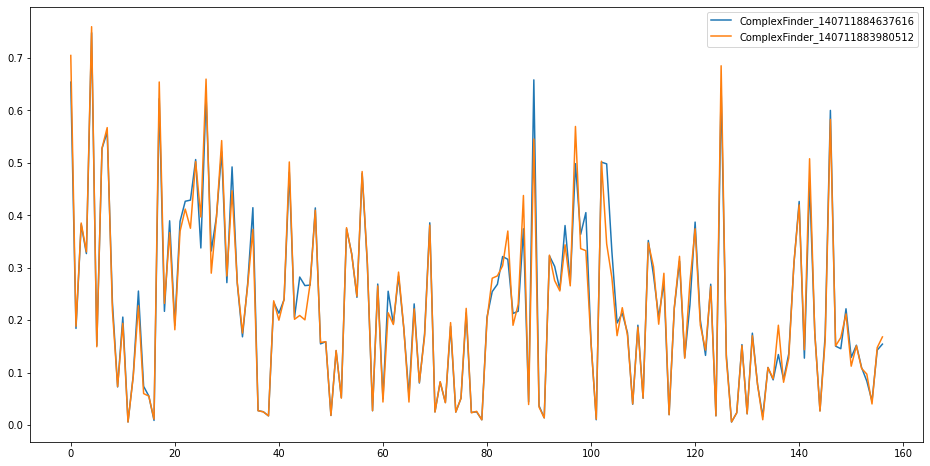

In [25]:
stat.take([mcc_120c_500k_h250, mcc_120c_500k_h1000]).as_plot()

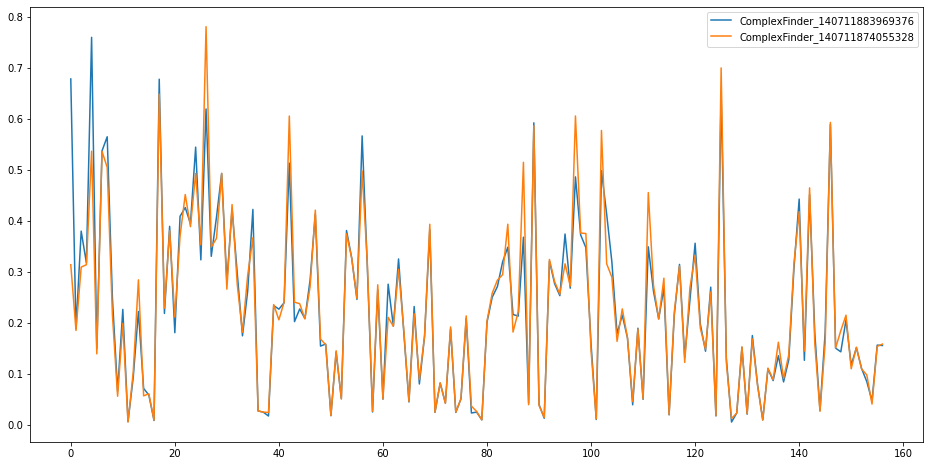

In [26]:
stat.take([mcc_120c_500k_h500, mcc_120c_500k_h2600]).as_plot()

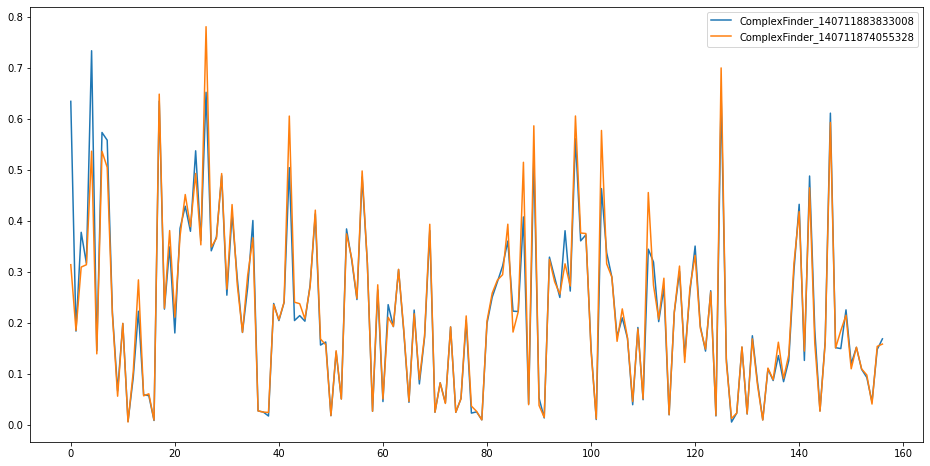

In [27]:
stat.take([mcc_120c_500k_h750, mcc_120c_500k_h2600]).as_plot()

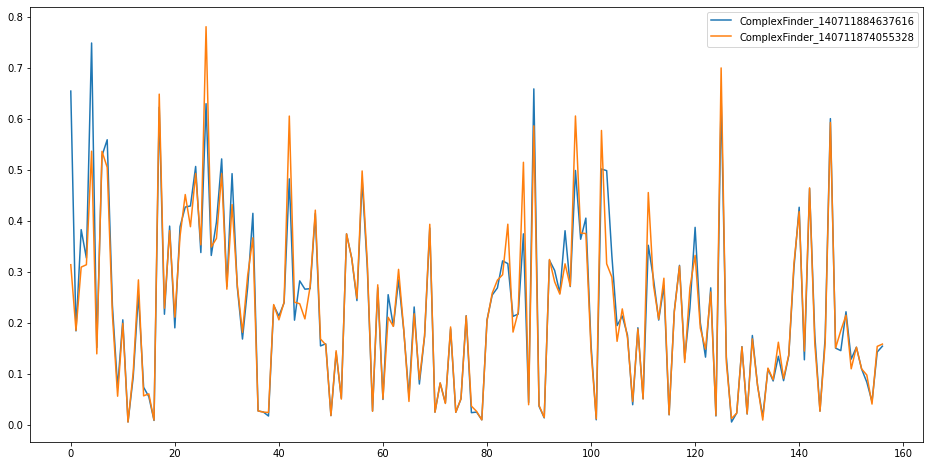

In [34]:
stat.take([mcc_120c_500k_h250, mcc_120c_500k_h2600]).as_plot()

In [16]:
from fp_utils.draw import MoleculeDrawer

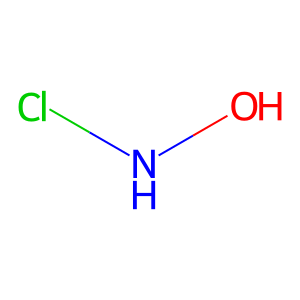

In [40]:
query = 'Cl-N-O'
MoleculeDrawer.draw_one(query)

In [41]:
answers = search(query, mcc100_2kk, ans_count=10)

18.978s -- search


In [42]:
len(answers)

10

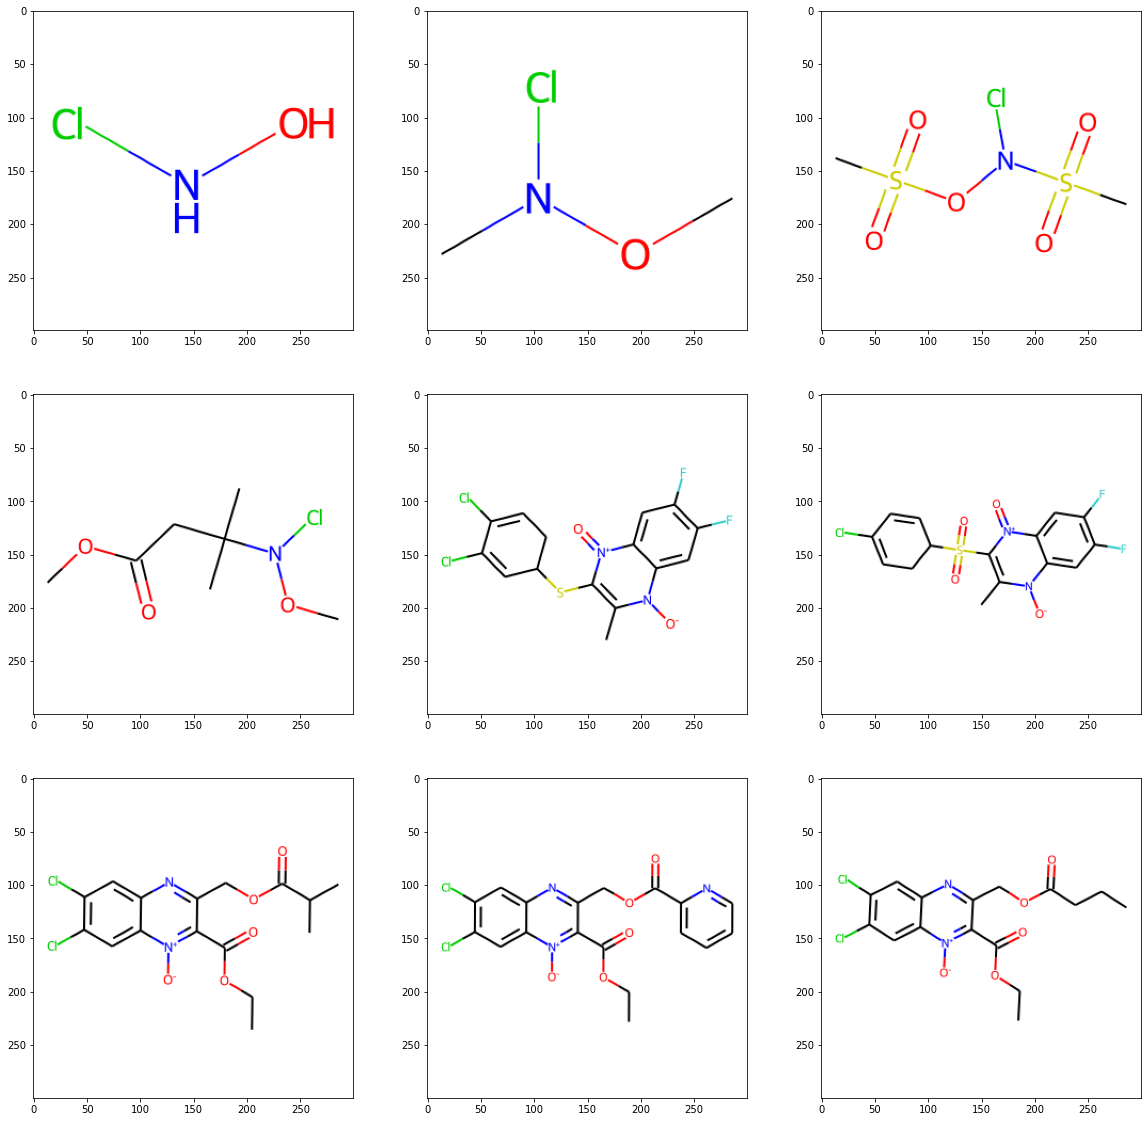

In [43]:
MoleculeDrawer.draw_many(answers, figsize=(20, 20), shape=(3, 3))